In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [119]:
data = pd.read_excel("./Data/Fred_data.xlsx")

In [120]:
data.head()

,date,crsp-index,ANFCI,GS1M,GS10,HOUST,VIXCLS,GS10 -GS1M,CPI,IPI
0,1990-01-01,-0.070115,-0.04,0.57,8.21,1551,25.36,7.64,53.793610,63.4228
1,1990-02-01,0.014901,-0.15,0.57,8.47,1437,21.99,7.90,54.004565,64.0446
2,1990-03-01,0.024140,-0.18,0.64,8.59,1289,19.73,7.95,54.257711,64.3580
3,1990-04-01,-0.028286,-0.02,0.69,8.79,1248,19.52,8.10,54.384285,64.2602
4,1990-05-01,0.088934,-0.14,0.68,8.76,1212,17.37,8.08,54.468667,64.3973


In [121]:
data.describe()

,crsp-index,ANFCI,GS1M,GS10,HOUST,VIXCLS,GS10 -GS1M,CPI,IPI
count,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,0.008156,-0.378276,0.225230,4.590891,1301.456897,19.311810,4.365661,80.754923,90.632081
std,0.042348,0.604687,0.190825,1.906930,409.596091,7.440128,1.743794,15.452472,13.774065
min,-0.184648,-1.110000,0.000000,1.500000,478.000000,9.510000,1.480000,53.793610,62.119000
25%,-0.017566,-0.702500,0.010000,2.867500,1036.750000,13.655000,2.765000,67.452968,81.348325
50%,0.012797,-0.540000,0.210000,4.525000,1289.500000,17.400000,4.225000,79.741116,94.500250
75%,0.035562,-0.290000,0.400000,6.030000,1582.500000,23.385000,5.700000,95.619829,101.937650
max,0.114030,3.090000,0.690000,8.890000,2273.000000,59.890000,8.290000,106.656485,110.587800


In [122]:
corr = data.corr()

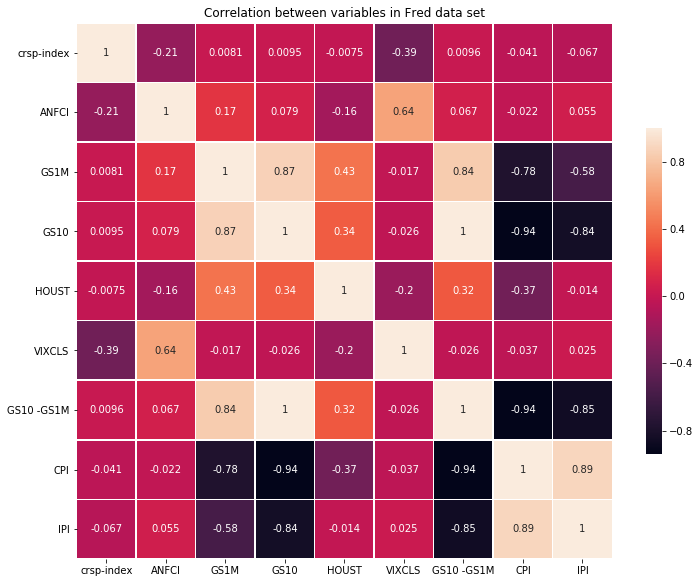

In [124]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
# plot correlation matrix
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=True,
            cbar_kws={"shrink": .5})
ax.set_title('Correlation between variables in Fred data set')
plt.show()

* CPI and IPI are (in a negative manner) highly correlated with GS10, and CPI is (in a negative manner) highly correlated with GS1M, so substituting CIP and IPI with their percentages may lead to better results

* GS10-GS1M are highly correlated with both GS10 and GS1M, so we should remove GS10-GS1M to avoid multicollinearity in 
regression model

* GS10 and GS1M are highly corrolated, so we should remove one of them to avoid multicollinearity in regression model

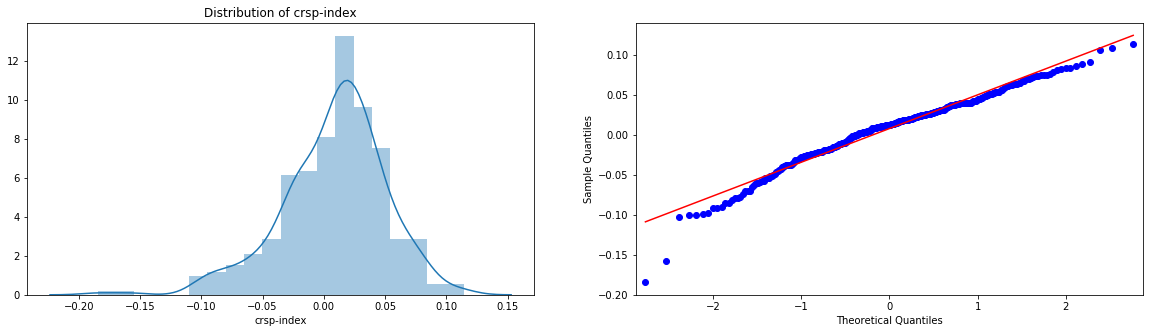

In [125]:
from statsmodels.graphics.gofplots import qqplot

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.distplot(data['crsp-index'], ax=ax1)
ax1.set(title="Distribution of crsp-index")
qqplot(data['crsp-index'], line='s', ax=ax2)
#ax2.set(title="Theoretical quantiles")
plt.show()

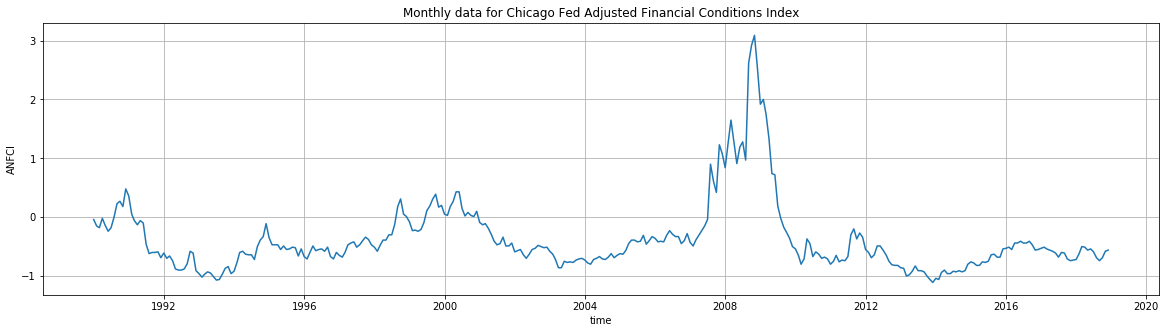

In [126]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5), linewidth=5)

ax.plot(data["date"], data["ANFCI"])
ax.set_xlabel('time')
ax.set_ylabel('ANFCI')
ax.set_title('Monthly data for Chicago Fed Adjusted Financial Conditions Index')
ax.grid(True)

plt.show()
#fig.savefig("./Plots/ANFCI_plot.png")

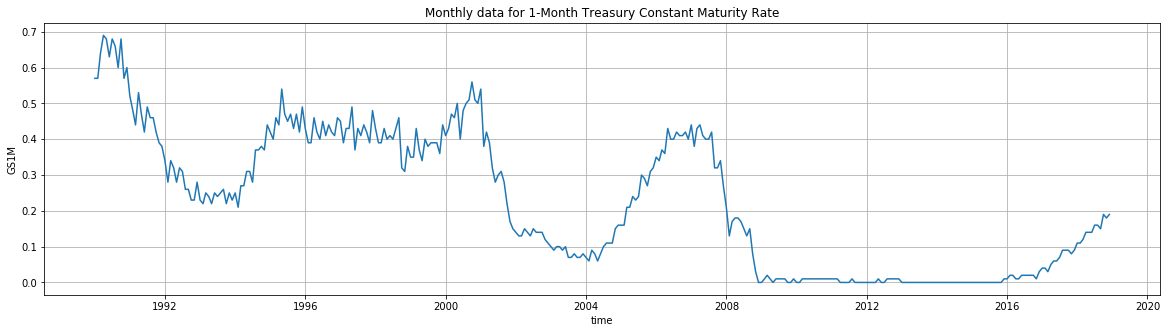

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5), linewidth=5)

ax.plot(data["date"], data["GS1M"])
ax.set_xlabel('time')
ax.set_ylabel('GS1M')
ax.set_title('Monthly data for 1-Month Treasury Constant Maturity Rate')
ax.grid(True)

plt.show()
#fig.savefig("./Plots/GS1M_plot.png")

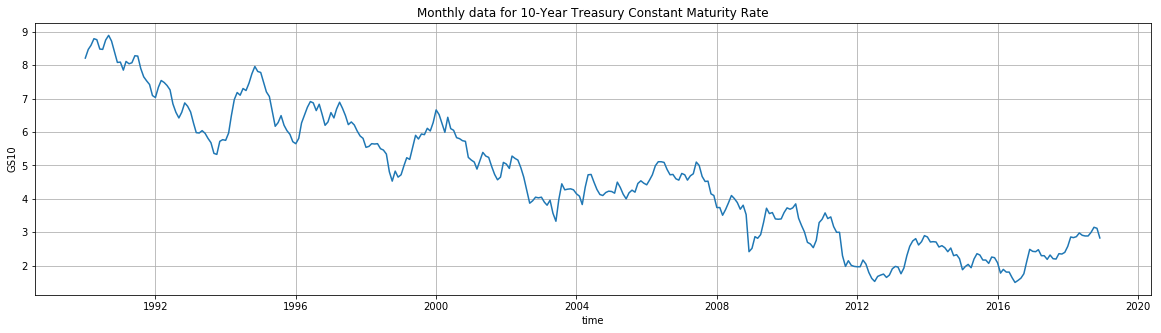

In [128]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5), linewidth=5)

ax.plot(data["date"], data["GS10"])
ax.set_xlabel('time')
ax.set_ylabel('GS10')
ax.set_title('Monthly data for 10-Year Treasury Constant Maturity Rate')
ax.grid(True)

plt.show()
#fig.savefig("./Plots/GS10_plot.png")

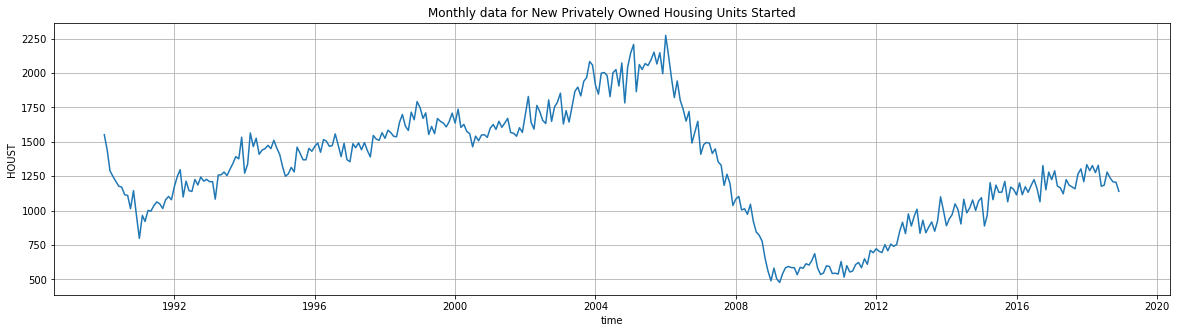

In [129]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5), linewidth=5)

ax.plot(data["date"], data["HOUST"])
ax.set_xlabel('time')
ax.set_ylabel('HOUST')
ax.set_title('Monthly data for New Privately Owned Housing Units Started')
ax.grid(True)

plt.show()
#fig.savefig("./Plots/HOUST_plot.png")

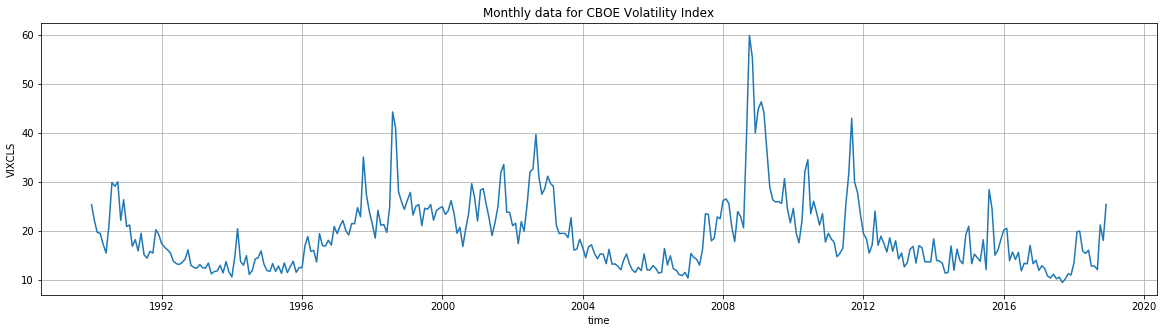

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5), linewidth=5)

ax.plot(data["date"], data["VIXCLS"])
ax.set_xlabel('time')
ax.set_ylabel('VIXCLS')
ax.set_title('Monthly data for CBOE Volatility Index')
ax.grid(True)

plt.show()
#fig.savefig("./Plots/VIXCLS_plot.png")

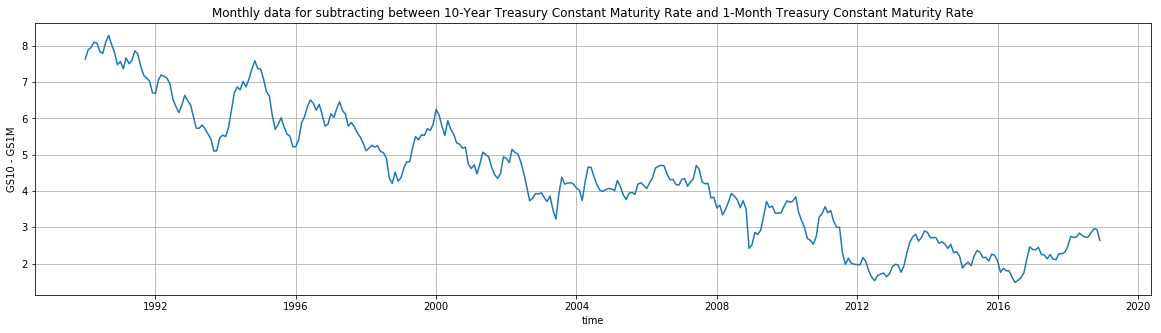

In [131]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5), linewidth=5)

ax.plot(data["date"], data["GS10 -GS1M"])
ax.set_xlabel('time')
ax.set_ylabel('GS10 - GS1M')
ax.set_title('Monthly data for subtracting between 10-Year Treasury Constant Maturity Rate and 1-Month Treasury Constant Maturity Rate')
ax.grid(True)

plt.show()
#fig.savefig("./Plots/GS10 -GS1M_plot.png")

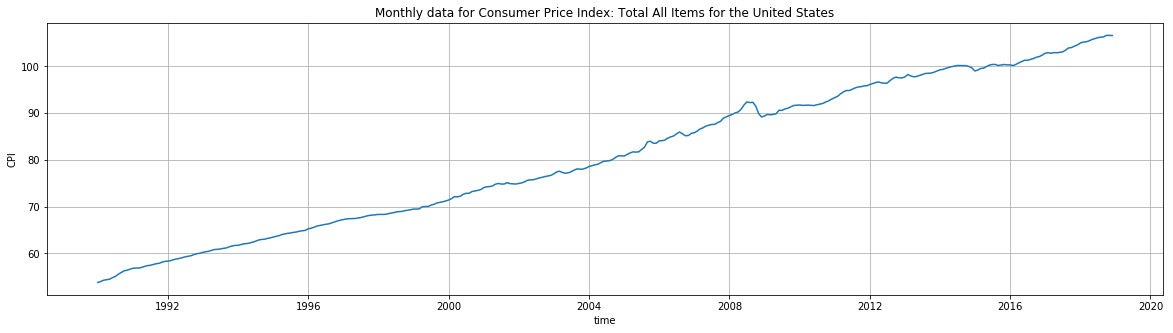

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5), linewidth=5)

ax.plot(data["date"], data["CPI"])
ax.set_xlabel('time')
ax.set_ylabel('CPI')
ax.set_title('Monthly data for Consumer Price Index: Total All Items for the United States')
ax.grid(True)

plt.show()
#fig.savefig("./Plots/CPI_plot.png")

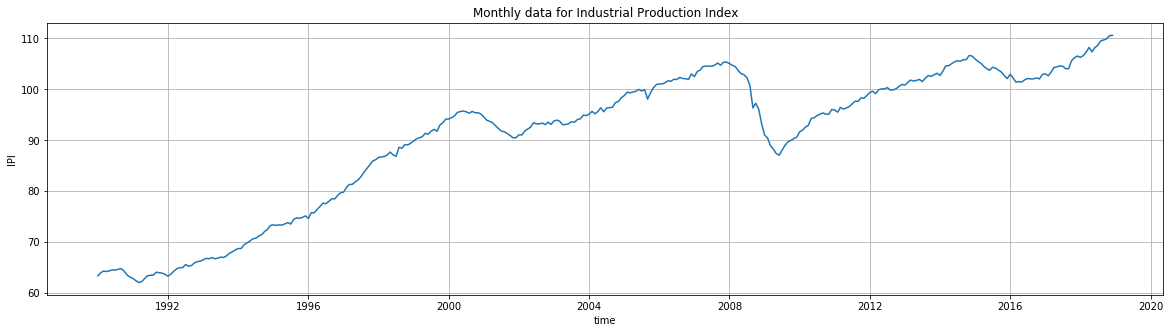

In [133]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5), linewidth=5)

ax.plot(data["date"], data["IPI"])
ax.set_xlabel('time')
ax.set_ylabel('IPI')
ax.set_title('Monthly data for Industrial Production Index')
ax.grid(True)

plt.show()
#fig.savefig("./Plots/IPII_plot.png")

In [142]:
data = pd.read_excel("./Data/Fred_data.xlsx")

In [143]:
data.head()

,date,crsp-index,ANFCI,GS1M,GS10,HOUST,VIXCLS,GS10 -GS1M,CPI,IPI,CPI percentage,IPI percentage
0,1990-01-01,-0.070115,-0.04,0.57,8.21,1551,25.36,7.64,53.793610,63.4228,NaN,NaN
1,1990-02-01,0.014901,-0.15,0.57,8.47,1437,21.99,7.90,54.004565,64.0446,0.003922,0.009804
2,1990-03-01,0.024140,-0.18,0.64,8.59,1289,19.73,7.95,54.257711,64.3580,0.004687,0.004893
3,1990-04-01,-0.028286,-0.02,0.69,8.79,1248,19.52,8.10,54.384285,64.2602,0.002333,-0.001520
4,1990-05-01,0.088934,-0.14,0.68,8.76,1212,17.37,8.08,54.468667,64.3973,0.001552,0.002134


In [144]:
del data["CPI"]
del data["IPI"]
del data["GS1M"]   # for avoiding multicollinearity
del data["GS10 -GS1M"]   # for avoiding multicollinearity

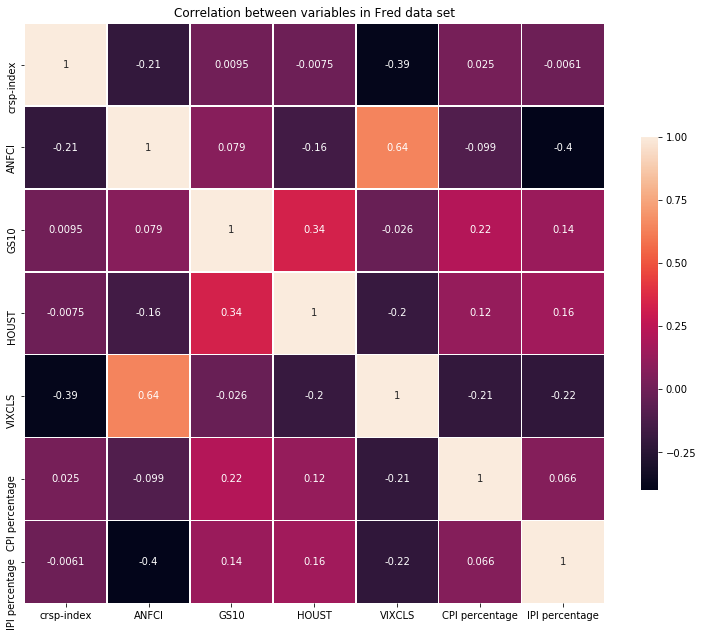

In [147]:
corr = data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
# plot correlation matrix
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(corr, mask=mask, square=True, linewidths=.5, annot=True,
            cbar_kws={"shrink": .5})
ax.set_title('Correlation between variables in Fred data set')
plt.show()

* after substituting CPI and IPI with their percentages, the issue of highly (negative) correlated has been resolved
* GS10-GS1M and GS1M have been removed to avoid multicollinearity in regression

In [116]:
from sklearn import preprocessing

X = data.iloc[:, 2:9]

normalized_X = (X - X.mean()) / X.std()
#normalized_X = preprocessing.normalize(X)  # Simple feature scaling

data.iloc[:, 2:9] = normalized_X

In [117]:
data.describe()

,crsp-index,ANFCI,GS1M,GS10,HOUST,VIXCLS,GS10 -GS1M,CPI
count,210.000000,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,0.006118,-3.092764e-17,-1.015061e-16,1.985185e-16,7.864080e-17,8.934652e-17,1.102822e-15,-5.212761e-16
std,0.042235,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-0.184648,-1.018699e+00,-8.323309e-01,-1.688410e+00,-1.550430e+00,-1.202644e+00,-2.619826e+00,-1.761292e+00
25%,-0.015829,-4.879326e-01,-7.927050e-01,-9.201524e-01,-7.945104e-01,-7.131247e-01,-6.044506e-01,-7.971628e-01
50%,0.011578,-2.644520e-01,-2.742673e-01,2.223933e-03,-1.305890e-01,-2.918825e-01,9.971654e-02,4.110219e-02
75%,0.029833,-3.049579e-02,3.448861e-01,8.592167e-01,8.430602e-01,4.750101e-01,7.310388e-01,8.798161e-01
max,0.114030,4.847666e+00,2.608511e+00,1.842306e+00,2.119282e+00,4.939812e+00,1.712016e+00,1.623554e+00


In [118]:
data.to_excel("./Data/Fred_normalized_data.xlsx", index=None, header=True)